In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('predictive_maintenance.csv')

In [3]:
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df1 = df1.drop(['Product ID', 'Type', 'UDI'], axis=1)

In [5]:
df1.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,No Failure
1,298.2,308.7,1408,46.3,3,0,No Failure
2,298.1,308.5,1498,49.4,5,0,No Failure
3,298.2,308.6,1433,39.5,7,0,No Failure
4,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
from sklearn .preprocessing import LabelEncoder
encode=LabelEncoder()

In [7]:
df1.loc[:,df1.columns[-1]]=encode.fit_transform(df1.loc[:,df1.columns[-1]])

In [8]:
encode.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [9]:
df1.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,1
1,298.2,308.7,1408,46.3,3,0,1
2,298.1,308.5,1498,49.4,5,0,1
3,298.2,308.6,1433,39.5,7,0,1
4,298.2,308.7,1408,40.0,9,0,1


In [10]:
x = df1.drop(['Target', 'Failure Type'], axis=1)

In [11]:
y1 = df1['Target']

In [12]:
y1

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

In [13]:
df1.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,1
1,298.2,308.7,1408,46.3,3,0,1
2,298.1,308.5,1498,49.4,5,0,1
3,298.2,308.6,1433,39.5,7,0,1
4,298.2,308.7,1408,40.0,9,0,1


# Data Set is imbalanced

In [14]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [15]:
x.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9


In [16]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(x, y1)
# new class distribution 
print(Counter(y_ros))

Counter({0: 9661, 1: 9661})


In [17]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(x, y1)
print(f"Oversampled: {Counter(y_over)}")

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 9661, 1: 4830})
Combined Random Sampling: Counter({0: 6037, 1: 4830})


<AxesSubplot:xlabel='Target', ylabel='count'>

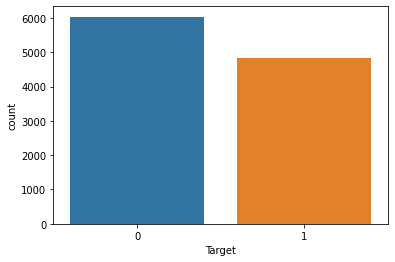

In [18]:
sns.countplot(x=y_combined_sampling)

In [19]:
x_new = X_combined_sampling
y_new = y_combined_sampling

In [20]:
x_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,301.7,310.7,1763,25.9,3
1,298.2,307.9,1769,27.2,188
2,302.3,311.0,1329,51.5,154
3,299.8,311.3,1785,25.4,139
4,301.4,310.6,1464,48.6,96


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30)

In [27]:
clf1 = RandomForestClassifier(n_jobs=-1, bootstrap=True, max_depth=11) 

In [28]:
clf1.fit(x_new, y_new)

RandomForestClassifier(max_depth=11, n_jobs=-1)

In [29]:
y_pred = clf1.predict(x_test)

In [30]:
y_pred1 = clf1.predict(x_train)

In [31]:
y_pred_cm = clf1.predict(x_new)

In [32]:
from sklearn import metrics 
print("TEST ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

TEST ACCURACY OF THE MODEL:  0.9963201471941122


In [33]:
print("TRAIN ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred1))

TRAIN ACCURACY OF THE MODEL:  0.9961872206153037


In [34]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_new, y_pred_cm)
print(cf_matrix)

[[5996   41]
 [   0 4830]]


<AxesSubplot:>

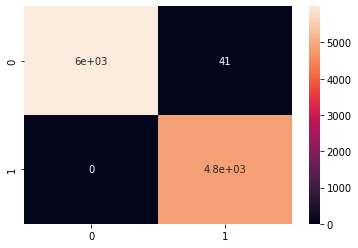

In [35]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

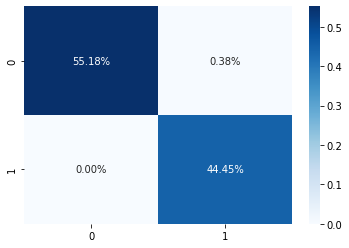

In [36]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [37]:
from sklearn.tree import export_graphviz

In [38]:
estimator = clf1.estimators_[5]

In [39]:
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = x_new.columns,
                class_names = 'Target',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [40]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [41]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('somefile.png')

ModuleNotFoundError: No module named 'pydot'

In [42]:
graph.write_png('somefile.png')

NameError: name 'graph' is not defined

In [43]:
tree.export_graphviz(model_name,'tree.dot',filled=True,feature_names=features,
                     class_names= classes)

#convert dot into image
check_call(['dot','-Tpng','m1_ent.dot','-0','m1_ent.png'])

NameError: name 'tree' is not defined

In [44]:
process = subprocess.Popen(command, stdout=tempFile, shell=True)

NameError: name 'subprocess' is not defined

In [45]:
from subprocess import check_call
check_call(['C:/Users/214220002/Desktop/Projects 4/tree.dot','-Tpng','Tree.dot','-o','File.png'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [46]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [47]:
x_new.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [55]:
y_new

0        0
1        0
2        0
3        0
4        0
        ..
10862    1
10863    1
10864    1
10865    1
10866    1
Name: Target, Length: 10867, dtype: int64

In [56]:
y_pred_cm

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

# Model for Failure Type

In [57]:
df1.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,1
1,298.2,308.7,1408,46.3,3,0,1
2,298.1,308.5,1498,49.4,5,0,1
3,298.2,308.6,1433,39.5,7,0,1
4,298.2,308.7,1408,40.0,9,0,1


In [58]:
y2 = df1['Failure Type']

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

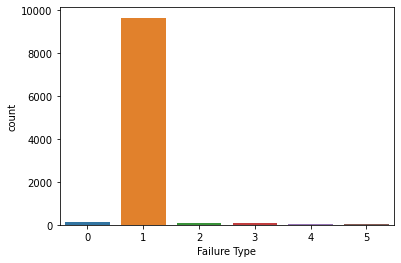

In [59]:
sns.countplot(x=df1['Failure Type'])

# Data Set is imbalanced

In [60]:
# instantiating over and under sampler
over = RandomOverSampler()
under = RandomUnderSampler()
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(x2, y2)
print(f"Oversampled: {Counter(y_over)}")

# now to comine under sampling 
x_combined_sampling2, y_combined_sampling2 = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

NameError: name 'x2' is not defined

In [54]:
sns.countplot(x=y_combined_sampling2)

NameError: name 'y_combined_sampling2' is not defined

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_combined_sampling2, y_combined_sampling2, test_size = 0.30)

In [ ]:
clf2 = RandomForestClassifier(n_jobs=-1, bootstrap=True, max_depth=10) 

In [ ]:
clf2.fit(x_train2, y_train2)

In [ ]:
y_pred2 = clf2.predict(x_test2)

In [ ]:
y_pred3 = clf2.predict(x_train2)

In [ ]:
y_pred_cm2 = clf2.predict(x_combined_sampling2)

In [ ]:
from sklearn import metrics 
print("TEST ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test2, y_pred2))

In [ ]:
print("TRAIN ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train2, y_pred3))

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_combined_sampling2, y_pred_cm2)
print(cf_matrix)

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
#conda install pydot-ng 

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## Dumping both the model (for Target and Failure type into a pickle file)

In [ ]:
x_test2

In [ ]:
x_test2.shape

In [ ]:
x = np.array([[290,300,100,100,10]])

In [61]:
df_columns = x_test.columns

In [62]:
df_columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [ ]:
df_test = pd.DataFrame(x, columns = df_columns)

In [ ]:
clf1.predict(x)

In [ ]:
clf1.predict(df_test)

In [ ]:
Q1=Q2=Q3=Q4=Q5=0

In [ ]:
import pickle

In [ ]:
data = {'model1':clf1, 'Q1':Q1, 'Q2':Q2, 'Q3':Q3, 'Q4':Q4, 'Q5':Q5}

with open('saved_steps_cf1.pkl', 'wb') as file:
    pickle.dump(data,file)

In [ ]:
data = {'model2':clf2, 'Q1':Q1, 'Q2':Q2, 'Q3':Q3, 'Q4':Q4, 'Q5':Q5}

with open('saved_steps_cf2.pkl', 'wb') as file:
    pickle.dump(data,file)